# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [17]:
library(tidyverse)

setwd("C:/Users/MCT40/OneDrive - University of Pittsburgh/Classes/Spring2022/CMU_STATS/HOMEWORK")
LD <- read.csv("lexDat/LexicalData_withIncorrect.csv")
items <- read.csv("lexDat/items.csv")

names(LD)[names(LD) == "D_Word"] <- "Word" 

LD <- left_join(LD, items, by='Word') #adding together all of the variables to make the final question of the homework easier

LD %>% 
  left_join(
    select(items, Word, Length, Log_Freq_HAL),
    by = "Word"
  ) -> LD2

LD2 %>% drop_na() -> LD3 #remove NAs save to LD2
any(LD3 == "n/a")

head(LD3)

ERROR: Error in library(ggplot): there is no package called 'ggplot'


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Log_Freq_HAL' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(

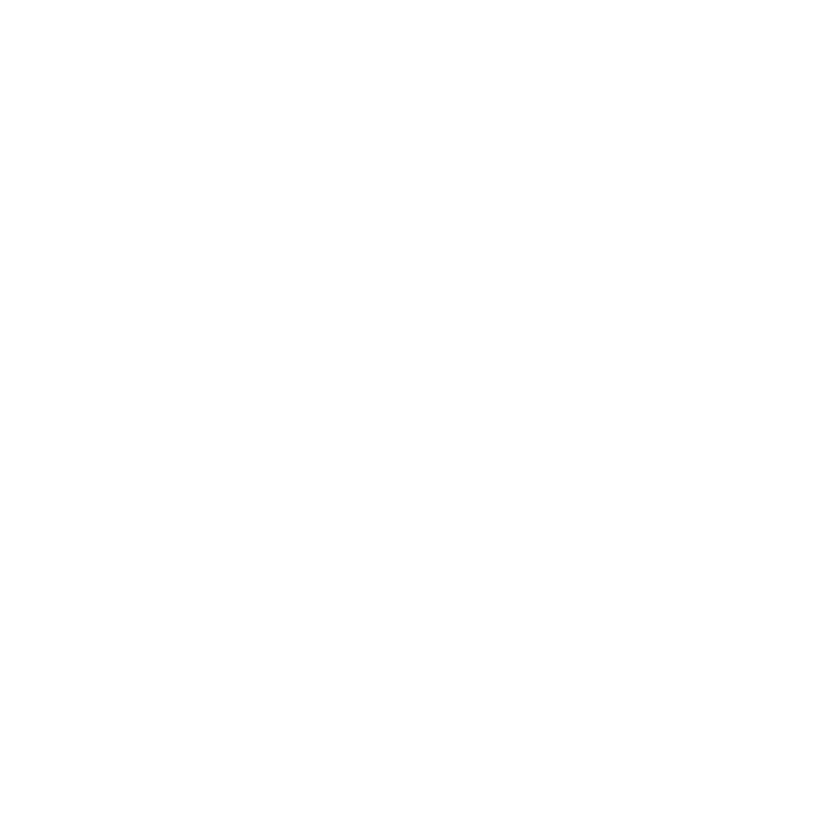

In [15]:
LD3$Correct <- as.factor(LD3$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(LD3,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + 
geom_point(position="jitter",alpha=0.5) + theme_light() 



What do you observe about the "Correct" and "Incorrect" clusters? 

> Shorter words and those with lower Log_Freq_Hal values tend to be more often incorrect than those with higher values in those variables

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [5]:
# WRITE YOUR CODE HERE
Log_reg <- glm(Correct ~ Length*Log_Freq_HAL, data= LD3, family = binomial)
summary(Log_reg)

#Because GITHUB womp womp: 

# Call:
#   glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
#       data = LD3)
# 
# Deviance Residuals: 
#   Min       1Q   Median       3Q      Max  
# -3.0494   0.3178   0.4182   0.5208   1.3225  
# 
# Coefficients:
#   Estimate Std. Error z value Pr(>|z|)    
# (Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
#   Length               0.151266   0.012789  11.828  < 2e-16 ***
#   Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
#   Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
#   ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
# 
# (Dispersion parameter for binomial family taken to be 1)
# 
# Null deviance: 49809  on 70588  degrees of freedom
# Residual deviance: 46563  on 70585  degrees of freedom
# (4280 observations deleted due to missingness)
# AIC: 46571
# 
# Number of Fisher Scoring iterations: 5


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = LD3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
  (4280 observations deleted due to missingness)
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> The intercept of the mode being significant represents the mean oh the correct response (which isn't sensical) when the log odds and length of the word are 0, which isn't applicable or interesting.

> The main effect of length indicates that as length increases so to does the log odds of number of correct responses determining whether or not it was a real word.

>The main effect of Log_Freq_HAL  indicates that as that variable increases so too do the log odds of number of correct responses determining whether or not it was a real word.

> The interaction between the two terms indicates that as one of the variables increases the influence of the other variable decreases. Such that one predictor variable has a different influences on the outcome variable depending on the behaviour of the second predictor variable (Length and Log_Freq_HAL).

> because the contrasts were not coded we cannot say much more about these effects

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [10]:
## Assign threshold to equal 0.50
threshold = 0.50

## Create new data frame containing predicted values for each observation, 
## based on the fit of the logistic regression model run in part 3. 
LD_predict = data.frame(predict(Log_reg, type = "response"))

## Rename the predicted values generated above to "predicted_prob" for ease of interpretability
colnames(LD_predict) = c('predicted_prob')
head(LD_predict)

# Make a list of "Incorrect" responses (coded as 0)
num_obs = length(LD3)
LD_predict$predicted_binary=rep(0,num_obs)
LD_predict$predicted_binary[LD_predict$predicted_prob>threshold]= 1

# Look at the prediction accuracy in form of confusion matrix table
LD_conf = data.frame(LD_predict$predicted_binary, LD3$Correct)
colnames(LD_conf) = c('predicted', 'actual')
table(LD_conf)

## Abbreviated summary: 
## 13 predicted 0 actual 0 (true neg)
## 44 predicted 0 actual 1 (false neg)
## 7966 predicted 1 actual 0 (fale pos)
## 62566 predicted 1 actual 1 (true pos)

## Calculate the general accuracy of the model's predictions: 
print(paste("Accuracy:",mean(LD_conf$predicted == LD_conf$actual)))



[1] 14

,predicted_prob
,<dbl>
1,0.9479784
2,0.8826628
3,0.9417677
4,0.7707288
5,0.6682356
6,0.8704362


ERROR: Error in `$<-.data.frame`(`*tmp*`, predicted_binary, value = c(0, 0, 0, : replacement has 14 rows, data has 70589


Did the model do well at predicting lexical decision correctness? Why or why not? 

> *Write your response here*  
> 

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [ ]:
## Load in MASS library
library(MASS)

## Fit QDA model on data set (no test train split here)
lexDat_qda.fit = qda(Correct ~ Length*Log_Freq_HAL, data=lexDat_accuracy_final)
lexDat_qda.fit


## Create a data frame containing posterior probabilities of 0 and 1 for each observation
qda_prob_df = data.frame(predict(lexDat_qda.fit, type = "response"))
head(qda_prob_df)

## Take that new data frame and create a new column such that if the
## posterior probability of 1 is greater than 0.5, it will assign a 1 and otherwise
## will assign a 0:

qda_prob_df %>%
  mutate(predicted_binary = if_else(posterior.1 >= threshold, 1, 0)) -> qda_prob_df2



Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [ ]:
## Generate confusion matrix
confusion_df2 = data.frame(qda_prob_df2$predicted_binary, lexDat_accuracy_final$Correct)
colnames(confusion_df2) = c('predicted', 'actual')
table(confusion_df2)


print(paste("Accuracy:",mean(confusion_df2$predicted == confusion_df2$actual)))

How does QDA prediction performance differ from that of logistic regression?

> *Write your response here* 
> 

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg, and her fascinating taste in marshmallow, matcha, cinnamon candle scents